IMPORT LIBRARIES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
Training set shape: (8000, 784)
Testing set shape: (2000, 784)
Training target shape: (8000,)
Testing target shape: (2000,)


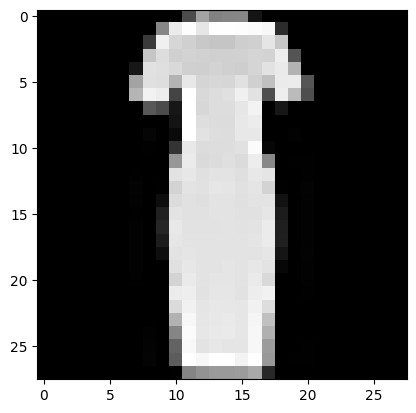

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.6387 - loss: 17.2442 - val_accuracy: 0.7800 - val_loss: 0.8417
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8448 - loss: 0.5212 - val_accuracy: 0.8210 - val_loss: 0.6030
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8854 - loss: 0.3513 - val_accuracy: 0.8315 - val_loss: 0.5972
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9175 - loss: 0.2309 - val_accuracy: 0.8510 - val_loss: 0.5403
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9398 - loss: 0.1699 - val_accuracy: 0.8605 - val_loss: 0.5092
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9535 - loss: 0.1281 - val_accuracy: 0.8565 - val_loss: 0.5778
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9513 - loss: 0.1367 - val_accuracy: 0.8530 - val_loss: 0.5297
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9611 - loss: 0.1064 - va

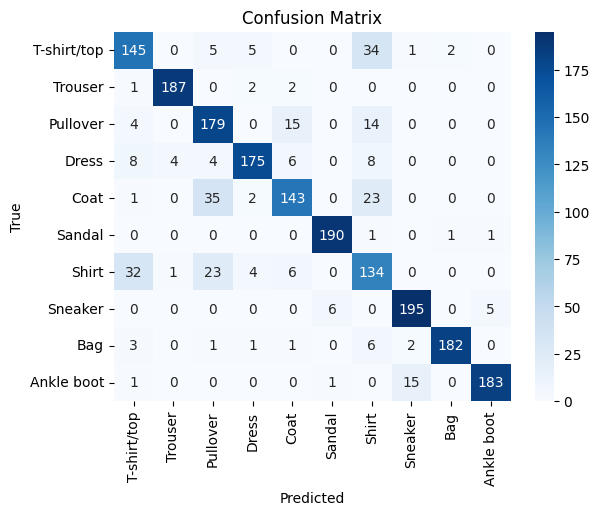

total 30M
-rw-r--r-- 1 root root  22M Oct 29 11:25 DATASET.CSV
-rw-r--r-- 1 root root 8.0M Oct 29 11:27 fashion_model.keras
drwxr-xr-x 1 root root 4.0K Oct 25 13:20 sample_data


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/DATASET.CSV')
df.info()

# Define the target column and feature columns
target_column = 'label'
feature_columns = [col for col in df.columns if col != target_column]

# Define features (X) and target variable (y)
X = df[feature_columns]  # All columns except 'label'
y = df[target_column]    # The 'label' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Display the first training image
plt.imshow(X_train.iloc[3].values.reshape(28, 28), cmap='gray')
plt.show()
y_test[3]

import tensorflow as tf

# Reshape the data to the format expected by CNNs: (samples, height, width, channels)
X_train_cnn = X_train.values.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.values.reshape(-1, 28, 28, 1)

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions
y_pred_cnn = model.predict(X_test_cnn)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict labels for the test set
y_pred_cnn = model.predict(X_test_cnn).argmax(axis=1)

# Generate a confusion matrix
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report

# Save the model
model.save('fashion_model.keras')

!ls -lh



In [ ]:
import os

# List files in the /content directory
content_path = '/content'
files_in_content = os.listdir(content_path)
print(files_in_content)

['.config', 'fashion_model.keras', 'DATASET.CSV', 'sample_data']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Define paths
file_path = '/content/fashion_model.keras'
destination_path = '/content/drive/MyDrive/models/fashion_model.keras'

# Create destination directory if it does not exist
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Copy the file
shutil.copy(file_path, destination_path)
print(f"File copied to {destination_path}")

File copied to /content/drive/MyDrive/models/fashion_model.keras
